In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [60]:
data_path = '../data/updated_cleaned_patient_data.csv'
data = pd.read_csv(data_path)

print(data.head())
print(data.info())
print(data.describe())

      FBS    BMI  Diabetes   age  hypertension  vegetarian (1= yes, 0=no)  \
0  228.69  34.00         1  71.0             1                          1   
1  202.21  32.48         0  52.0             1                          0   
2  105.92  30.50         1  78.0             1                          1   
3  171.23  35.00         0  54.0             1                          0   
4  174.12  28.00         0  79.0             1                          0   

   Exercise (min/week)  stroke  Cholesterol  Living_Area_Code  \
0                  0.0       1        210.5                 1   
1                 90.0       1        190.0                 0   
2                  0.0       1        190.0                 0   
3                  0.0       1        240.5                 1   
4                 90.0       1        190.0                 0   

   Marriage_Status_Code  
0                     1  
1                     1  
2                     1  
3                     1  
4               

In [61]:
col_names = data.columns.tolist()
print("Column Names:", col_names)

Column Names: ['FBS', 'BMI', 'Diabetes', 'age', 'hypertension', 'vegetarian (1= yes, 0=no)', 'Exercise (min/week)', 'stroke', 'Cholesterol', 'Living_Area_Code', 'Marriage_Status_Code']


In [62]:
data_encoded = pd.get_dummies(data, drop_first=True)
x = data_encoded.drop('stroke', axis=1)
y = data_encoded['stroke']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) # 80% training and 20% test

In [63]:
clf = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=100, 
    min_samples_leaf=5,
    random_state=42,
)
clf.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,100
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [64]:
print("Training Accuracy:", clf.score(x_train, y_train))
print("Validation Accuracy:", clf.score(x_test, y_test))

Training Accuracy: 0.825
Validation Accuracy: 0.78


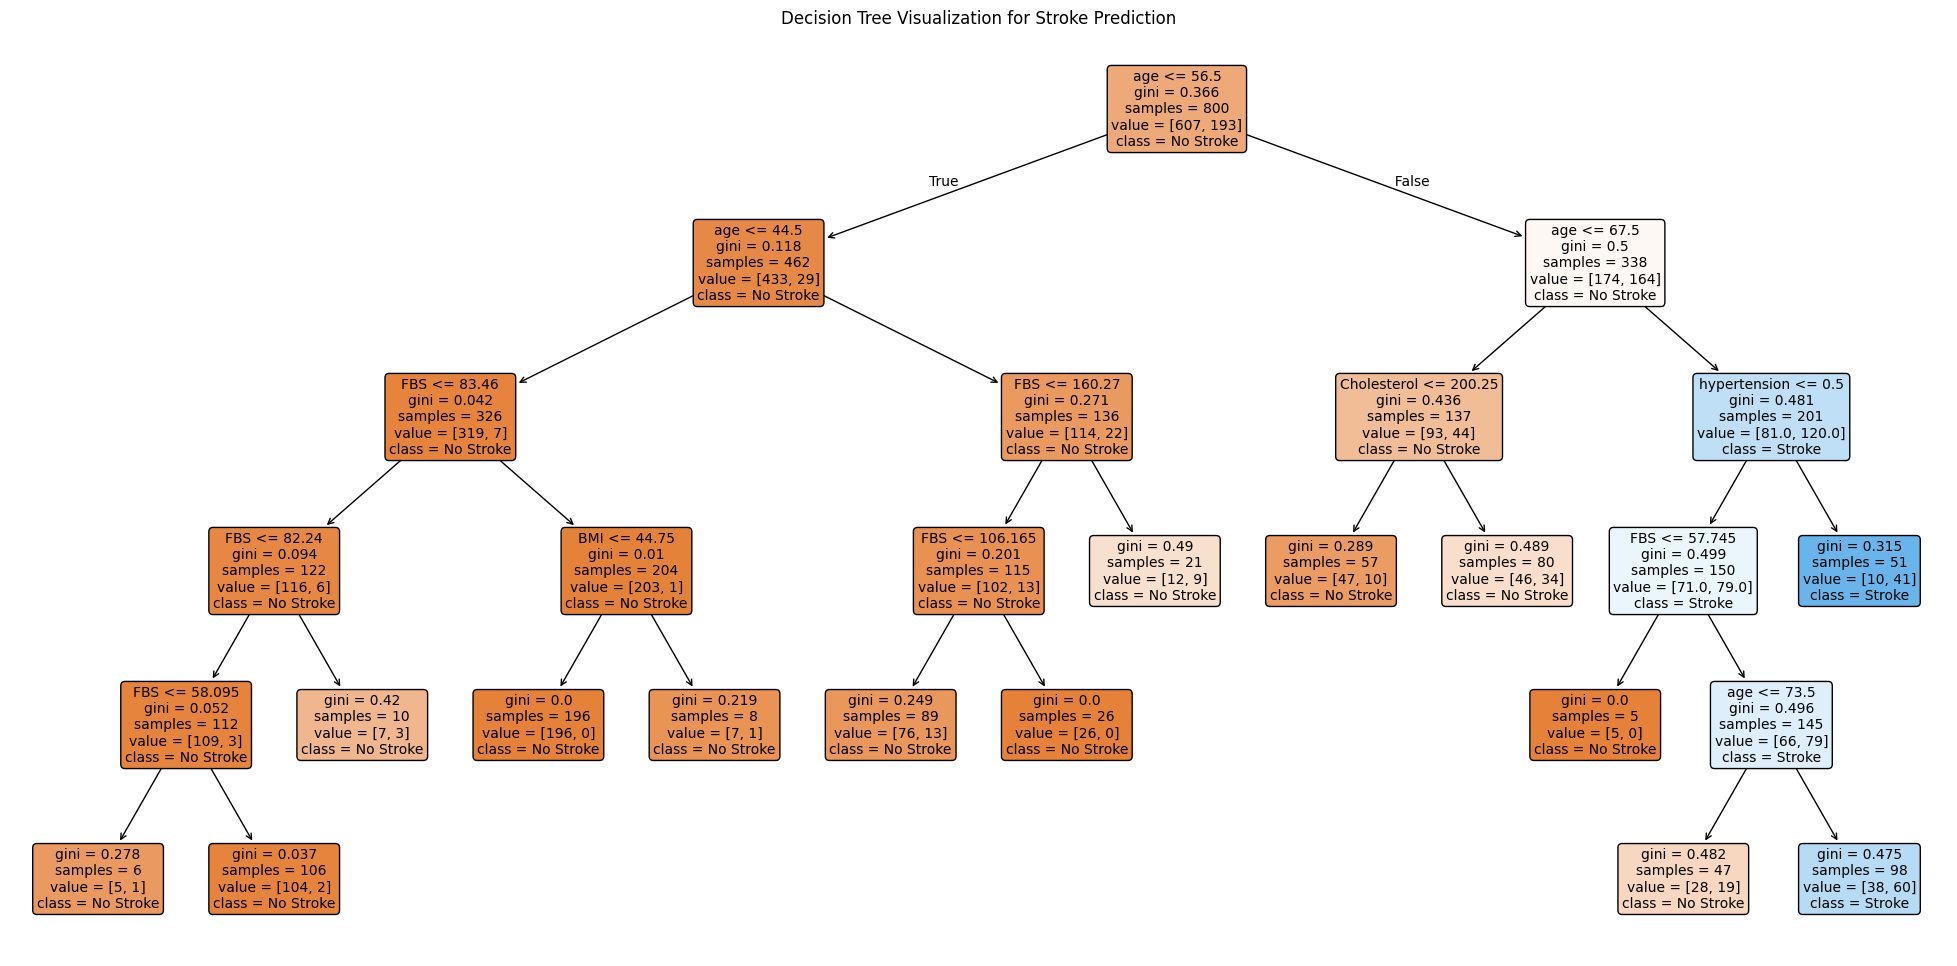

In [65]:
#Graph
# 1. ตั้งค่าขนาดของภาพ (ปรับตัวเลขได้ถ้าภาพเล็กไป)
plt.figure(figsize=(25, 12))

# 2. วาดกราฟ
plot_tree(
    clf,              # ใส่โมเดลที่เราฝึกเสร็จแล้ว
    feature_names=X.columns,      # ใส่ชื่อคอลัมน์เพื่อให้รูว่าโหนดนั้นเช็คค่าอะไร
    class_names=['No Stroke', 'Stroke'], # ใส่ชื่อผลลัพธ์ (0=No Stroke, 1=Stroke)
    filled=True,                  # ระบายสีตามความมั่นใจ (สีเข้ม=มั่นใจมาก)
    rounded=True,                 # ทำให้กล่องมน ดูง่ายขึ้น
    fontsize=10                   # ขนาดตัวอักษร
)

# 3. แสดงผล
plt.title("Decision Tree Visualization for Stroke Prediction")
plt.show()